In [148]:
!nvidia-smi

Fri Feb  3 12:16:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    27W /  70W |   1808MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [149]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [150]:
import torch
import torchvision
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights


In [151]:
import torch.nn as nn


In [152]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT, progress=True)
model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [153]:
for param in model.parameters():
    param.requires_grad = False

In [154]:
model.classifier[1] = nn.Linear(in_features=1280, out_features=1)
model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [155]:
import torchvision.datasets as datasets

In [156]:
WORKERS = 8

In [157]:
from torchvision import datasets, transforms

data_dir = '/content/drive/MyDrive/torch_ds/data/train'
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

train_images = datasets.ImageFolder(data_dir, transform=train_transform)


In [158]:
train_images

Dataset ImageFolder
    Number of datapoints: 5911
    Root location: /content/drive/MyDrive/torch_ds/data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [159]:
train_loader = torch.utils.data.DataLoader(train_images,
                                          batch_size=32, shuffle=True, drop_last=True, 
                                          num_workers=WORKERS)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [160]:
data_dir = '/content/drive/MyDrive/torch_ds/data/val'
transform  = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

val_images = datasets.ImageFolder(data_dir, transform=transform)
val_loader = torch.utils.data.DataLoader(val_images,
                                          batch_size=32, shuffle=True, drop_last=True,
                                          num_workers=WORKERS)
val_loader


In [177]:
data_dir = '/content/drive/MyDrive/torch_ds/data/test'
test_images = datasets.ImageFolder(data_dir, transform=transform)
test_loader = torch.utils.data.DataLoader(test_images,
                                          batch_size=32, 
                                          num_workers=2, drop_last=True)
test_loader

In [162]:
import time
import copy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

In [163]:
import numpy as np

In [164]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [165]:
import sys
from tqdm import tqdm

In [166]:
def train_model(model, dataloaders, criterion, optimizer, 
                scheduler, early_stopper, num_epochs=25):
    since = time.perf_counter()

    val_acc_history = []
    val_loss_history = []

    lengths = {}
    for phase in ['train', 'val']:
        lengths[phase] = len(dataloaders[phase].dataset)
        print(f'{phase}_iters: {lengths[phase] // 32}')

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    min_loss = 1

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)
        epoch_start = time.perf_counter()

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  
            else:
                model.eval() 

            lr = scheduler.optimizer.param_groups[0]['lr']
            running_loss = 0.0
            running_corrects = 0
            running_accuracy = 0.0

            with tqdm(dataloaders[phase], unit="batch", miniters=1) as tepoch:
                for iter_, (inputs, labels) in enumerate(tepoch, start=1):
                    if phase == 'train':
                        tepoch.set_description(f"Epoch {epoch + 1}")
                    else:
                        tepoch.set_description(f"Validation {epoch + 1}")

                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    labels = labels.type(torch.float32)
                    labels = labels.view(-1, 1)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):

                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        preds = torch.round(torch.sigmoid(outputs))

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds==labels.data)
                    running_accuracy = running_corrects / (iter_ * 32)
                    tepoch.set_postfix(loss=loss.item(), accuracy=running_accuracy.item())

                epoch_loss = running_loss / lengths[phase]
                epoch_acc = running_corrects.double() / lengths[phase]

                print(f'{phase}_loss: {epoch_loss:.4f} {phase}_acc: {epoch_acc:.4f}')

                if phase == 'val':
                    if epoch_acc > best_acc:
                        best_acc = epoch_acc

                    if min_loss - epoch_loss >= early_stopper.min_delta:
                        min_loss = epoch_loss
                        best_model_wts = copy.deepcopy(model.state_dict())
                        torch.save({'epoch': epoch, 
                                    'model_state_dict': model.state_dict(),
                                    'optimizer_state_dict': optimizer.state_dict(),
                                    'loss': epoch_loss}, 
                                    '/content/drive/MyDrive/models/mobile_net_v2.tar')

                    scheduler.step(epoch_loss)
                    val_acc_history.append(epoch_acc)
                    val_loss_history.append(epoch_loss)
                    print(f"lr: {lr}  min_loss: {min_loss:.4f}")

        epoch_end = time.perf_counter()
        time_elapsed =  epoch_end - epoch_start

        print(f'Epoch {epoch + 1} took {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

        if early_stopper.early_stop(epoch_loss):             
            break

        print()

    time_elapsed = time.perf_counter() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val_acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model, val_acc_history, val_loss_history

In [167]:
import torch.optim as optim

In [168]:
for name, param in model.named_parameters():
      if param.requires_grad == True:
          print("\t",name)

	 classifier.1.weight
	 classifier.1.bias


In [169]:
nadam = optim.NAdam(params=model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(nadam, patience=3, factor=0.1, threshold=1e-3, min_lr=1e-9)
criterion = nn.BCEWithLogitsLoss()
dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}

In [170]:
model.classifier[1].weight

Parameter containing:
tensor([[-0.0167,  0.0222,  0.0041,  ..., -0.0171,  0.0142, -0.0232]],
       requires_grad=True)

In [171]:
model = model.to(device)
model, val_acc_his, val_loss_his = train_model(model, dataloaders, criterion, nadam, scheduler,
            EarlyStopper(patience=3, min_delta=1e-3))

train_iters: 184
val_iters: 23
Epoch 1/25
----------


Epoch 1: 100%|██████████| 184/184 [00:50<00:00,  3.63batch/s, accuracy=0.685, loss=0.597]


train_loss: 0.5930 train_acc: 0.6823


Validation 1: 100%|██████████| 23/23 [01:16<00:00,  3.33s/batch, accuracy=0.785, loss=0.493]


val_loss: 0.4839 val_acc: 0.7821
lr: 0.0001  min_loss: 0.4838735402356304
Epoch 1 took 2m 7s

Epoch 2/25
----------


Epoch 2: 100%|██████████| 184/184 [00:40<00:00,  4.59batch/s, accuracy=0.804, loss=0.4]


train_loss: 0.4669 train_acc: 0.8005


Validation 2: 100%|██████████| 23/23 [00:07<00:00,  2.90batch/s, accuracy=0.909, loss=0.446]


val_loss: 0.3557 val_acc: 0.9053
lr: 0.0001  min_loss: 0.35570967600697273
Epoch 2 took 0m 48s

Epoch 3/25
----------


Epoch 3: 100%|██████████| 184/184 [00:38<00:00,  4.73batch/s, accuracy=0.866, loss=0.461]


train_loss: 0.3937 train_acc: 0.8628


Validation 3: 100%|██████████| 23/23 [00:05<00:00,  4.01batch/s, accuracy=0.932, loss=0.265]


val_loss: 0.2842 val_acc: 0.9283
lr: 0.0001  min_loss: 0.28415518878116014
Epoch 3 took 0m 45s

Epoch 4/25
----------


Epoch 4: 100%|██████████| 184/184 [00:38<00:00,  4.81batch/s, accuracy=0.883, loss=0.321]


train_loss: 0.3489 train_acc: 0.8801


Validation 4: 100%|██████████| 23/23 [00:05<00:00,  3.99batch/s, accuracy=0.942, loss=0.226]


val_loss: 0.2424 val_acc: 0.9378
lr: 0.0001  min_loss: 0.24243292982749268
Epoch 4 took 0m 44s

Epoch 5/25
----------


Epoch 5: 100%|██████████| 184/184 [00:40<00:00,  4.59batch/s, accuracy=0.899, loss=0.301]


train_loss: 0.3135 train_acc: 0.8951


Validation 5: 100%|██████████| 23/23 [00:05<00:00,  3.96batch/s, accuracy=0.954, loss=0.229]


val_loss: 0.2061 val_acc: 0.9499
lr: 0.0001  min_loss: 0.2060978086778695
Epoch 5 took 0m 46s

Epoch 6/25
----------


Epoch 6: 100%|██████████| 184/184 [00:37<00:00,  4.88batch/s, accuracy=0.895, loss=0.3]


train_loss: 0.2961 train_acc: 0.8919


Validation 6: 100%|██████████| 23/23 [00:05<00:00,  4.00batch/s, accuracy=0.959, loss=0.185]


val_loss: 0.1819 val_acc: 0.9553
lr: 0.0001  min_loss: 0.18192201118830575
Epoch 6 took 0m 44s

Epoch 7/25
----------


Epoch 7: 100%|██████████| 184/184 [00:37<00:00,  4.87batch/s, accuracy=0.911, loss=0.234]


train_loss: 0.2715 train_acc: 0.9075


Validation 7: 100%|██████████| 23/23 [00:05<00:00,  3.96batch/s, accuracy=0.967, loss=0.131]


val_loss: 0.1645 val_acc: 0.9635
lr: 0.0001  min_loss: 0.1645312548006339
Epoch 7 took 0m 44s

Epoch 8/25
----------


Epoch 8: 100%|██████████| 184/184 [00:38<00:00,  4.83batch/s, accuracy=0.914, loss=0.259]


train_loss: 0.2587 train_acc: 0.9103


Validation 8: 100%|██████████| 23/23 [00:05<00:00,  4.02batch/s, accuracy=0.973, loss=0.151]


val_loss: 0.1551 val_acc: 0.9689
lr: 0.0001  min_loss: 0.15513711788657553
Epoch 8 took 0m 44s

Epoch 9/25
----------


Epoch 9: 100%|██████████| 184/184 [00:37<00:00,  4.88batch/s, accuracy=0.915, loss=0.132]


train_loss: 0.2470 train_acc: 0.9115


Validation 9: 100%|██████████| 23/23 [00:05<00:00,  4.03batch/s, accuracy=0.977, loss=0.13]


val_loss: 0.1367 val_acc: 0.9729
lr: 0.0001  min_loss: 0.1367199962936009
Epoch 9 took 0m 44s

Epoch 10/25
----------


Epoch 10: 100%|██████████| 184/184 [00:39<00:00,  4.64batch/s, accuracy=0.911, loss=0.161]


train_loss: 0.2445 train_acc: 0.9071


Validation 10: 100%|██████████| 23/23 [00:05<00:00,  3.99batch/s, accuracy=0.98, loss=0.134]


val_loss: 0.1232 val_acc: 0.9756
lr: 0.0001  min_loss: 0.12318668701006692
Epoch 10 took 0m 46s

Epoch 11/25
----------


Epoch 11: 100%|██████████| 184/184 [00:37<00:00,  4.87batch/s, accuracy=0.917, loss=0.345]


train_loss: 0.2318 train_acc: 0.9134


Validation 11: 100%|██████████| 23/23 [00:05<00:00,  3.97batch/s, accuracy=0.978, loss=0.144]


val_loss: 0.1205 val_acc: 0.9743
lr: 0.0001  min_loss: 0.12054360283889048
Epoch 11 took 0m 44s

Epoch 12/25
----------


Epoch 12: 100%|██████████| 184/184 [00:37<00:00,  4.86batch/s, accuracy=0.916, loss=0.297]


train_loss: 0.2258 train_acc: 0.9129


Validation 12: 100%|██████████| 23/23 [00:05<00:00,  3.97batch/s, accuracy=0.974, loss=0.106]


val_loss: 0.1126 val_acc: 0.9702
lr: 0.0001  min_loss: 0.11263734820085869
Epoch 12 took 0m 44s

Epoch 13/25
----------


Epoch 13: 100%|██████████| 184/184 [00:37<00:00,  4.87batch/s, accuracy=0.918, loss=0.169]


train_loss: 0.2209 train_acc: 0.9142


Validation 13: 100%|██████████| 23/23 [00:05<00:00,  4.00batch/s, accuracy=0.981, loss=0.0554]


val_loss: 0.1092 val_acc: 0.9770
lr: 0.0001  min_loss: 0.10921539166622136
Epoch 13 took 0m 44s

Epoch 14/25
----------


  0%|          | 0/184 [00:00<?, ?batch/s]Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fb4c3095700><function _MultiProcessingDataLoaderIter.__del__ at 0x7fb4c3095700>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7fb4c3095700>
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
if w.is_alive():self._shutdown_workers()
    Exception ignored in: 
  File "/usr/lib/python3.8/multiprocessing/process.py", line

train_loss: 0.2109 train_acc: 0.9188


Validation 14: 100%|██████████| 23/23 [00:06<00:00,  3.71batch/s, accuracy=0.978, loss=0.0639]


val_loss: 0.1029 val_acc: 0.9743
lr: 0.0001  min_loss: 0.10293263301797745
Epoch 14 took 0m 49s

Epoch 15/25
----------


Epoch 15: 100%|██████████| 184/184 [00:38<00:00,  4.78batch/s, accuracy=0.92, loss=0.195]


train_loss: 0.2113 train_acc: 0.9161


Validation 15: 100%|██████████| 23/23 [00:05<00:00,  3.86batch/s, accuracy=0.981, loss=0.121]


val_loss: 0.0984 val_acc: 0.9770
lr: 0.0001  min_loss: 0.09842985892650723
Epoch 15 took 0m 45s

Epoch 16/25
----------


Epoch 16: 100%|██████████| 184/184 [00:38<00:00,  4.75batch/s, accuracy=0.918, loss=0.259]


train_loss: 0.2104 train_acc: 0.9147


Validation 16: 100%|██████████| 23/23 [00:05<00:00,  3.91batch/s, accuracy=0.982, loss=0.115]


val_loss: 0.0913 val_acc: 0.9783
lr: 0.0001  min_loss: 0.09130748957193914
Epoch 16 took 0m 45s

Epoch 17/25
----------


Epoch 17: 100%|██████████| 184/184 [00:38<00:00,  4.83batch/s, accuracy=0.924, loss=0.313]


train_loss: 0.2018 train_acc: 0.9205


Validation 17: 100%|██████████| 23/23 [00:05<00:00,  3.94batch/s, accuracy=0.982, loss=0.0835]


val_loss: 0.0898 val_acc: 0.9783
lr: 0.0001  min_loss: 0.08976694485815355
Epoch 17 took 0m 44s

Epoch 18/25
----------


Epoch 18: 100%|██████████| 184/184 [00:38<00:00,  4.82batch/s, accuracy=0.924, loss=0.165]


train_loss: 0.1982 train_acc: 0.9203


Validation 18: 100%|██████████| 23/23 [00:05<00:00,  3.87batch/s, accuracy=0.98, loss=0.0716]


val_loss: 0.0855 val_acc: 0.9756
lr: 0.0001  min_loss: 0.08547525299418118
Epoch 18 took 0m 44s

Epoch 19/25
----------


Epoch 19: 100%|██████████| 184/184 [00:40<00:00,  4.56batch/s, accuracy=0.921, loss=0.172]


train_loss: 0.2003 train_acc: 0.9173


Validation 19: 100%|██████████| 23/23 [00:05<00:00,  3.93batch/s, accuracy=0.98, loss=0.0865]


val_loss: 0.0871 val_acc: 0.9756
lr: 0.0001  min_loss: 0.08547525299418118
Epoch 19 took 0m 46s

Epoch 20/25
----------


Epoch 20: 100%|██████████| 184/184 [00:38<00:00,  4.83batch/s, accuracy=0.926, loss=0.152]


train_loss: 0.1947 train_acc: 0.9222


Validation 20: 100%|██████████| 23/23 [00:05<00:00,  3.87batch/s, accuracy=0.981, loss=0.117]


val_loss: 0.0834 val_acc: 0.9770
lr: 0.0001  min_loss: 0.08338274958975744
Epoch 20 took 0m 44s

Epoch 21/25
----------


Epoch 21: 100%|██████████| 184/184 [00:38<00:00,  4.83batch/s, accuracy=0.922, loss=0.251]


train_loss: 0.1925 train_acc: 0.9185


Validation 21: 100%|██████████| 23/23 [00:05<00:00,  3.95batch/s, accuracy=0.982, loss=0.0658]


val_loss: 0.0781 val_acc: 0.9783
lr: 0.0001  min_loss: 0.07809298149787686
Epoch 21 took 0m 44s

Epoch 22/25
----------


Epoch 22: 100%|██████████| 184/184 [00:38<00:00,  4.81batch/s, accuracy=0.917, loss=0.395]


train_loss: 0.1998 train_acc: 0.9139


Validation 22: 100%|██████████| 23/23 [00:05<00:00,  3.95batch/s, accuracy=0.981, loss=0.115]


val_loss: 0.0768 val_acc: 0.9770
lr: 0.0001  min_loss: 0.07677548196222204
Epoch 22 took 0m 44s

Epoch 23/25
----------


Epoch 23: 100%|██████████| 184/184 [00:38<00:00,  4.76batch/s, accuracy=0.925, loss=0.164]


train_loss: 0.1896 train_acc: 0.9210


Validation 23: 100%|██████████| 23/23 [00:07<00:00,  3.17batch/s, accuracy=0.978, loss=0.0699]


val_loss: 0.0761 val_acc: 0.9743
lr: 0.0001  min_loss: 0.07677548196222204
Epoch 23 took 0m 46s

Epoch 24/25
----------


Epoch 24: 100%|██████████| 184/184 [00:38<00:00,  4.74batch/s, accuracy=0.925, loss=0.176]


train_loss: 0.1838 train_acc: 0.9217


Validation 24: 100%|██████████| 23/23 [00:05<00:00,  3.95batch/s, accuracy=0.98, loss=0.0473]


val_loss: 0.0735 val_acc: 0.9756
lr: 0.0001  min_loss: 0.07345210779987588
Epoch 24 took 0m 45s

Epoch 25/25
----------


Epoch 25: 100%|██████████| 184/184 [00:38<00:00,  4.79batch/s, accuracy=0.923, loss=0.302]


train_loss: 0.1881 train_acc: 0.9196


Validation 25: 100%|██████████| 23/23 [00:05<00:00,  3.86batch/s, accuracy=0.977, loss=0.101]


val_loss: 0.0736 val_acc: 0.9729
lr: 0.0001  min_loss: 0.07345210779987588
Epoch 25 took 0m 44s

Training complete in 20m 2s
Best val_acc: 0.978349


In [172]:
model, val_acc_his, val_loss_his = train_model(model, dataloaders, criterion, nadam, scheduler,
                                                EarlyStopper(patience=3, min_delta=1e-3))

train_iters: 184
val_iters: 23
Epoch 1/25
----------


  0%|          | 0/184 [00:00<?, ?batch/s]/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Epoch 1: 100%|██████████| 184/184 [00:40<00:00,  4.55batch/s, accuracy=0.933, loss=0.343]


train_loss: 0.1793 train_acc: 0.9298


Validation 1: 100%|██████████| 23/23 [00:05<00:00,  3.92batch/s, accuracy=0.98, loss=0.0557]


val_loss: 0.0741 val_acc: 0.9756
lr: 0.0001  min_loss: 0.07410266934938134
Epoch 1 took 0m 46s

Epoch 2/25
----------


Epoch 2: 100%|██████████| 184/184 [00:37<00:00,  4.84batch/s, accuracy=0.928, loss=0.14]


train_loss: 0.1790 train_acc: 0.9247


Validation 2: 100%|██████████| 23/23 [00:05<00:00,  3.94batch/s, accuracy=0.982, loss=0.0811]


val_loss: 0.0674 val_acc: 0.9783
lr: 0.0001  min_loss: 0.0673763698750807
Epoch 2 took 0m 44s

Epoch 3/25
----------


Epoch 3: 100%|██████████| 184/184 [00:38<00:00,  4.84batch/s, accuracy=0.916, loss=0.138]


train_loss: 0.1939 train_acc: 0.9124


Validation 3: 100%|██████████| 23/23 [00:05<00:00,  3.90batch/s, accuracy=0.985, loss=0.0463]


val_loss: 0.0654 val_acc: 0.9811
lr: 0.0001  min_loss: 0.0654182959957923
Epoch 3 took 0m 44s

Epoch 4/25
----------


Epoch 4: 100%|██████████| 184/184 [00:37<00:00,  4.84batch/s, accuracy=0.929, loss=0.333]


train_loss: 0.1768 train_acc: 0.9254


Validation 4: 100%|██████████| 23/23 [00:05<00:00,  3.92batch/s, accuracy=0.981, loss=0.056]


val_loss: 0.0686 val_acc: 0.9770
lr: 0.0001  min_loss: 0.0654182959957923
Epoch 4 took 0m 44s

Epoch 5/25
----------


Epoch 5: 100%|██████████| 184/184 [00:37<00:00,  4.86batch/s, accuracy=0.928, loss=0.17]


train_loss: 0.1783 train_acc: 0.9245


Validation 5: 100%|██████████| 23/23 [00:05<00:00,  3.98batch/s, accuracy=0.981, loss=0.0603]


val_loss: 0.0663 val_acc: 0.9770
lr: 0.0001  min_loss: 0.0654182959957923
Epoch 5 took 0m 44s

Epoch 6/25
----------


Epoch 6: 100%|██████████| 184/184 [00:39<00:00,  4.61batch/s, accuracy=0.927, loss=0.174]


train_loss: 0.1791 train_acc: 0.9239


Validation 6: 100%|██████████| 23/23 [00:05<00:00,  3.96batch/s, accuracy=0.982, loss=0.0568]


val_loss: 0.0658 val_acc: 0.9783
lr: 0.0001  min_loss: 0.0654182959957923
Epoch 6 took 0m 46s

Epoch 7/25
----------


Epoch 7: 100%|██████████| 184/184 [00:37<00:00,  4.86batch/s, accuracy=0.927, loss=0.199]


train_loss: 0.1721 train_acc: 0.9232


Validation 7: 100%|██████████| 23/23 [00:05<00:00,  3.98batch/s, accuracy=0.984, loss=0.0539]


val_loss: 0.0654 val_acc: 0.9797
lr: 0.0001  min_loss: 0.0654182959957923
Epoch 7 took 0m 44s

Epoch 8/25
----------


Epoch 8: 100%|██████████| 184/184 [00:37<00:00,  4.86batch/s, accuracy=0.927, loss=0.192]


train_loss: 0.1785 train_acc: 0.9239


Validation 8: 100%|██████████| 23/23 [00:05<00:00,  3.98batch/s, accuracy=0.985, loss=0.0354]


val_loss: 0.0626 val_acc: 0.9811
lr: 1e-05  min_loss: 0.06259424236372456
Epoch 8 took 0m 44s

Epoch 9/25
----------


Epoch 9: 100%|██████████| 184/184 [00:37<00:00,  4.85batch/s, accuracy=0.928, loss=0.17]


train_loss: 0.1768 train_acc: 0.9245


Validation 9: 100%|██████████| 23/23 [00:05<00:00,  3.99batch/s, accuracy=0.981, loss=0.0856]


val_loss: 0.0614 val_acc: 0.9770
lr: 1e-05  min_loss: 0.06142950146704791
Epoch 9 took 0m 44s

Epoch 10/25
----------


Epoch 10: 100%|██████████| 184/184 [00:40<00:00,  4.57batch/s, accuracy=0.926, loss=0.114]


train_loss: 0.1760 train_acc: 0.9225


Validation 10: 100%|██████████| 23/23 [00:05<00:00,  3.85batch/s, accuracy=0.981, loss=0.0151]


val_loss: 0.0642 val_acc: 0.9770
lr: 1e-05  min_loss: 0.06142950146704791
Epoch 10 took 0m 46s

Epoch 11/25
----------


Epoch 11: 100%|██████████| 184/184 [00:37<00:00,  4.85batch/s, accuracy=0.93, loss=0.168]


train_loss: 0.1761 train_acc: 0.9264


Validation 11: 100%|██████████| 23/23 [00:05<00:00,  4.01batch/s, accuracy=0.981, loss=0.0208]


val_loss: 0.0615 val_acc: 0.9770
lr: 1e-05  min_loss: 0.06142950146704791
Epoch 11 took 0m 44s

Epoch 12/25
----------


Epoch 12: 100%|██████████| 184/184 [00:37<00:00,  4.85batch/s, accuracy=0.927, loss=0.347]


train_loss: 0.1724 train_acc: 0.9239


Validation 12: 100%|██████████| 23/23 [00:05<00:00,  3.92batch/s, accuracy=0.984, loss=0.0392]


val_loss: 0.0659 val_acc: 0.9797
lr: 1e-05  min_loss: 0.06142950146704791
Epoch 12 took 0m 44s

Epoch 13/25
----------


Epoch 13: 100%|██████████| 184/184 [00:38<00:00,  4.78batch/s, accuracy=0.927, loss=0.0954]


train_loss: 0.1763 train_acc: 0.9237


Validation 13: 100%|██████████| 23/23 [00:05<00:00,  3.89batch/s, accuracy=0.984, loss=0.0245]


val_loss: 0.0629 val_acc: 0.9797
lr: 1e-05  min_loss: 0.06142950146704791
Epoch 13 took 0m 44s
Training complete in 9m 37s
Best val_acc: 0.981055


In [232]:
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import datetime

def plot_metrics(y_pred: np.array, y_test: np.array, threshold_proba=0.5, target_names=None) -> None:
    '''Plots the confusion matrix, ROC curve and the precision-recall curve.
    
        ### Parameters:
            y_pred: The predicted values (proba)
            y_test: The true values
        ### Returns: 
            None'''

    y_pred_hard = y_pred > threshold_proba

    print(classification_report(y_test, y_pred_hard, target_names=target_names))

    fig, ax = plt.subplots(2, 2)
    fig.set_figheight(12) 
    fig.set_figwidth(15)

    cm = confusion_matrix(y_test, y_pred_hard)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, ax=ax[0, 0])

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    line_threshold = [thresholds for thresholds in thresholds if thresholds >= threshold_proba][-1]
    idx = np.argwhere(thresholds == line_threshold)[0][0]
    ax[0, 1].plot(fpr, tpr, linewidth=2, label=None)
    ax[0, 1].plot(fpr[idx], tpr[idx], "rx")
    ax[0, 1].plot([0, 1], [0, 1], 'k--')
    ax[0, 1].axis([0, 1, 0, 1])
    ax[0, 1].set_xlabel('False Positive Rate', fontsize=10)
    ax[0, 1].set_ylabel('True Positive Rate', fontsize=10)

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    line_threshold = [thresholds for thresholds in thresholds if thresholds >= threshold_proba][0]
    idx = np.argwhere(thresholds == line_threshold)[0][0]
    ax[1, 0].plot(recall, precision, linewidth=2, label=None)
    ax[1, 0].plot(recall[idx], precision[idx], "rx")
    ax[1, 0].axis([0, 1, 0, 1])
    ax[1, 0].set_xlabel('Recall', fontsize=10)
    ax[1, 0].set_ylabel('Precision', fontsize=10)

    def plot_aux_lines():
        ax[1, 1].plot([line_threshold, line_threshold], [0., precision[idx]], "r:")
        ax[1, 1].plot([line_threshold, line_threshold], [0., recall[idx]], "r:")
        ax[1, 1].plot([0.0, line_threshold], [recall[idx], recall[idx]], "r:")

        ax[1, 1].plot([line_threshold], [recall[idx]], "gx")
        ax[1, 1].plot([line_threshold], [precision[idx]], "bx")
        
        ax[1, 1].text(line_threshold + 0.03, precision[idx], f'{precision[idx]:.2f}', fontsize=10, color="b")
        ax[1, 1].text(line_threshold + 0.03, recall[idx], f'{recall[idx]:.2f}', fontsize=10, color="g")
    
    ax[1, 1].plot(thresholds, precision[:-1], "b-", label="Precision")
    ax[1, 1].plot(thresholds, recall[:-1], "g-", label="Recall")

    plot_aux_lines()
    
    ax[1, 1].set_xlabel("Threshold", fontsize=10)
    ax[1, 1].legend(loc="upper right", fontsize=10)
    ax[1, 1].set_ylim([0, 1])
    ax[1, 1].set_xlim([0, 1])

    plt.show()

In [233]:
def test_model(model, test_dataloader, criterion):
    model.eval()

    since = time.perf_counter()

    running_loss = 0.0
    running_corrects = 0
    all_preds = np.array([])
    all_labels = np.array([])

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels.type(torch.float32)
        labels = labels.view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        preds = torch.sigmoid(outputs)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(torch.round(preds)==labels.data)

        labels = labels.to(torch.device('cpu'))
        preds = preds.to(torch.device('cpu'))

        labels_np = labels.detach().numpy()
        labels_np = np.reshape(labels_np, -1)
        all_labels = np.append(all_labels, labels_np, axis=0)

        preds_np = preds.detach().numpy()
        preds_np = np.reshape(preds_np, -1)
        all_preds = np.append(all_preds, preds_np, axis=0)

    test_loss = running_loss / len(test_dataloader.dataset)
    test_acc = running_corrects.double() / len(test_dataloader.dataset)

    print(f'test_loss: {test_loss:.4f} test_acc: {test_acc:.4f}\n')

    print(f'Tested in {(time.perf_counter() - since):.1f}s')
    
    return all_preds, all_labels

test_loss: 0.0736 test_acc: 0.9716

Tested in 5.4s
              precision    recall  f1-score   support

    dogs (0)       0.97      1.00      0.98       509
    cats (1)       0.99      0.93      0.96       227

    accuracy                           0.98       736
   macro avg       0.98      0.96      0.97       736
weighted avg       0.98      0.98      0.98       736



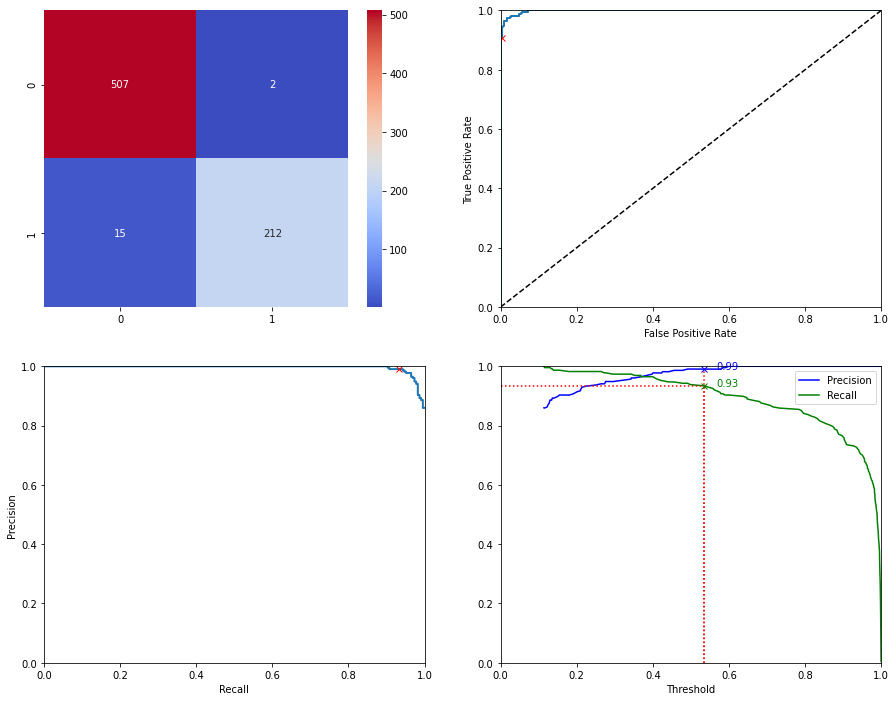

In [235]:
all_preds, all_labels = test_model(model, test_loader, nn.BCEWithLogitsLoss())
plot_metrics(all_preds, all_labels, target_names=['dogs (0)', 'cats (1)'])